In [9]:
! pip install QuantumRingsLib
! pip install QuantumRingsLib --upgrade

import QuantumRingsLib
print (QuantumRingsLib.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.7 MB/s eta 0:00:00
0.9.0


In [10]:
! pip install qiskit

import qiskit
print (qiskit.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.2 MB/s eta 0:00:00
1.3.2


In [ ]:
# ! pip install matplotlib

In [11]:
! pip install quantumrings-toolkit-qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
import math
import random
import fractions
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

import QuantumRingsLib
from QuantumRingsLib import (
    QuantumRegister,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRingsProvider,
    job_monitor,
    Gate,
    XGate,
    CXGate
)

provider = QuantumRingsProvider(
    token='rings-200.z55czKWsvsUzozFG0nPRpRD4a7f5rbph',
    name='jinho.lee@ravex.co.kr'
)
backend = provider.get_backend("scarlet_quantum_rings")
shots = 1024
provider.active_account()

# 최대 사용 가능한 큐빗 수 (여기서는 200)
MAX_QUBITS = 200


=== Testing 16-bit semiprime: N = 47053 ===

Attempt 1/200
Selected coprime a = 42865
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Done.
Ending Job Monitor
Invalid period r = None

Attempt 2/200
Selected coprime a = 2351
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job

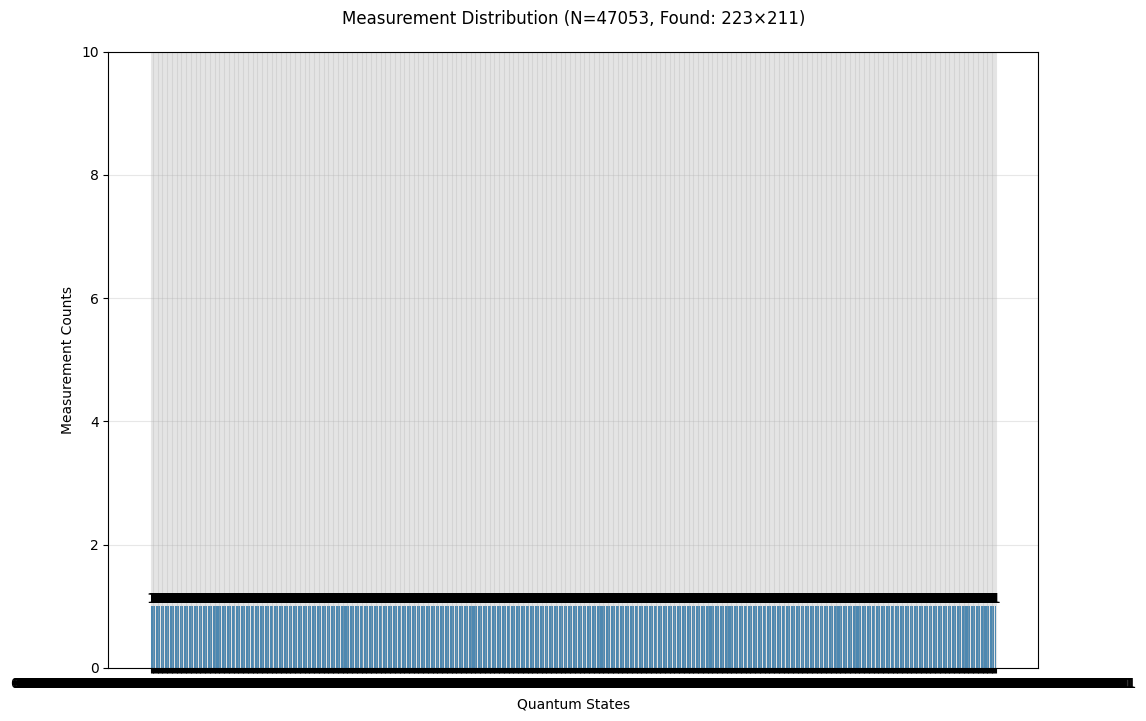

Success: 47053 = 223 × 211


In [14]:
from typing import Optional, Tuple, Dict, List
import math
import random
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

from QuantumRingsLib import (
    QuantumRegister,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRingsProvider,
    job_monitor,
    Gate,
    XGate,
    CXGate
)

@dataclass
class QuantumConfig:
    """Configuration for quantum computation settings."""
    max_qubits: int = 200
    shots: int = 1024
    provider_token: str = 'rings-200.z55czKWsvsUzozFG0nPRpRD4a7f5rbph'
    provider_name: str = 'jinho.lee@ravex.co.kr'
    backend_name: str = 'scarlet_quantum_rings'

class QuantumUtils:
    """Utility functions for quantum computations."""

    @staticmethod
    def plot_histogram(counts: Dict[str, int], title: str = "") -> None:
        """
        Enhanced histogram plotting with better visualization.

        Args:
            counts: Dictionary of state counts
            title: Graph title
        """
        fig, ax = plt.subplots(figsize=(12, 8))
        plt.xlabel("Quantum States")
        plt.ylabel("Measurement Counts")

        states = [key for key, val in counts.items() for _ in range(val)]
        unique, inverse = np.unique(states, return_inverse=True)
        bin_counts = np.bincount(inverse)

        bars = plt.bar(unique, bin_counts)

        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom')

        max_freq = max(counts.values())
        plt.ylim(ymax=np.ceil(max_freq / 10) * 10 if max_freq % 10 else max_freq + 10)

        plt.title(title, pad=20)
        plt.grid(True, alpha=0.3)
        plt.show()

class QuantumTransforms:
    """Quantum transformation operations."""

    @staticmethod
    def iqft(qc: QuantumCircuit, qubits: List[int]) -> None:
        """
        Improved Inverse Quantum Fourier Transform implementation.

        Args:
            qc: Quantum circuit
            qubits: List of qubits to apply IQFT
        """
        for i in range(len(qubits)):
            qc.h(qubits[i])
            for j in range(i + 1, len(qubits)):
                angle = -2 * math.pi / (2 ** (j - i + 1))
                qc.cu1(angle, qubits[j], qubits[i])
        qc.barrier()

class ModularArithmetic:
    """Modular arithmetic operations for quantum computing."""

    @staticmethod
    def controlled_modular_multiplication(
        qc: QuantumCircuit,
        control_qubit: int,
        target_register: List[int],
        factor: int,
        N: int
    ) -> None:
        """
        Enhanced controlled modular multiplication.

        Args:
            qc: Quantum circuit
            control_qubit: Control qubit index
            target_register: Target register qubits
            factor: Multiplication factor
            N: Modulus
        """
        num_target = len(target_register)
        for i in range(num_target):
            for j in range(i):
                angle = (math.pi / (2 ** (i - j))) % (2 * math.pi)
                qc.cu1(angle, target_register[j], target_register[i])
            qc.cx(control_qubit, target_register[i])
        qc.barrier()

    @staticmethod
    def modular_exponentiation(
        qc: QuantumCircuit,
        control_register: List[int],
        target_register: List[int],
        a: int,
        N: int
    ) -> None:
        """
        Improved modular exponentiation implementation.

        Args:
            qc: Quantum circuit
            control_register: Control register qubits
            target_register: Target register qubits
            a: Base for exponentiation
            N: Modulus
        """
        for j, control in enumerate(control_register):
            factor = pow(a, 2**j, N)
            ModularArithmetic.controlled_modular_multiplication(
                qc, control, target_register, factor, N
            )
            qc.barrier()

class ContinuedFraction:
    """Continued fraction calculations for period finding."""

    @staticmethod
    def calculate(x: float, max_iterations: int = 20) -> List[int]:
        """
        Calculate continued fraction expansion.

        Args:
            x: Input value
            max_iterations: Maximum iterations

        Returns:
            List of continued fraction terms
        """
        cf = []
        for _ in range(max_iterations):
            if abs(x) < 1e-10:
                break
            a = int(x)
            cf.append(a)
            frac = x - a
            if abs(frac) < 1e-10:
                break
            x = 1 / frac
        return cf

    @staticmethod
    def find_convergents(cf: List[int]) -> List[Tuple[int, int]]:
        """
        Find convergents from continued fraction expansion.

        Args:
            cf: Continued fraction terms

        Returns:
            List of numerator/denominator pairs
        """
        convs = []
        for i in range(len(cf)):
            num, den = 1, 0
            for a in reversed(cf[:i+1]):
                num, den = a * num + den, num
            convs.append((num, den))
        return convs

class ShorAlgorithm:
    """Main implementation of Shor's algorithm."""

    def __init__(self, config: QuantumConfig = QuantumConfig()):
        """
        Initialize Shor's algorithm with configuration.

        Args:
            config: Quantum configuration settings
        """
        self.config = config
        self.provider = QuantumRingsProvider(
            token=config.provider_token,
            name=config.provider_name
        )
        self.backend = self.provider.get_backend(config.backend_name)
        self.provider.active_account()

    def find_period(
        self,
        measured_value: int,
        t: int,
        a: int,
        N: int
    ) -> Optional[int]:
        """
        Find the period using continued fractions.

        Args:
            measured_value: Measured quantum state
            t: Number of control qubits
            a: Base for modular exponentiation
            N: Number to factor

        Returns:
            Period if found, None otherwise
        """
        phase = measured_value / (2 ** t)
        cf = ContinuedFraction.calculate(phase)
        convs = ContinuedFraction.find_convergents(cf)

        for num, den in convs:
            if den < 2 ** t and pow(a, den, N) == 1:
                return den
        return None

    def run_quantum_circuit(
        self,
        N: int,
        a: int
    ) -> Tuple[Optional[int], Dict[str, int]]:
        """
        Execute the quantum part of Shor's algorithm.

        Args:
            N: Number to factor
            a: Coprime base

        Returns:
            Tuple of (period, measurement counts)
        """
        t = math.ceil(math.log(N, 2)) * 2
        n = math.ceil(math.log(N, 2))
        total_qubits = t + n

        if total_qubits > self.config.max_qubits:
            raise ValueError(
                f"Required qubits ({total_qubits}) exceeds maximum ({self.config.max_qubits})"
            )

        # Create quantum circuit
        q = QuantumRegister(total_qubits, 'q')
        c = ClassicalRegister(t, 'c')
        qc = QuantumCircuit(q, c)

        # Initialize control register with Hadamard gates
        for i in range(t):
            qc.h(q[i])
        qc.barrier()

        # Initialize target register to |1⟩
        qc.x(q[t])
        qc.barrier()

        # Perform modular exponentiation
        control_register = [q[i] for i in range(t)]
        target_register = [q[i] for i in range(t, total_qubits)]
        ModularArithmetic.modular_exponentiation(
            qc, control_register, target_register, a, N
        )

        # Apply inverse QFT and measure
        QuantumTransforms.iqft(qc, control_register)
        for i in range(t):
            qc.measure(q[i], c[i])

        # Execute circuit
        job = self.backend.run(qc, shots=self.config.shots)
        job_monitor(job)
        result = job.result()
        counts = result.get_counts()

        # Find period from measurements
        measured_value = int(max(counts, key=counts.get), 2)
        period = self.find_period(measured_value, t, a, N)

        return period, counts

    def factor(self, N: int, max_attempts: int = 200) -> Optional[Tuple[int, int]]:
        """
        Factor a number using Shor's algorithm.

        Args:
            N: Number to factor
            max_attempts: Maximum number of attempts

        Returns:
            Tuple of factors if successful, None otherwise
        """
        for attempt in range(max_attempts):
            print(f"\nAttempt {attempt + 1}/{max_attempts}")

            # Choose random coprime
            a = random.randint(2, N - 1)
            while math.gcd(a, N) != 1:
                a = random.randint(2, N - 1)
            print(f"Selected coprime a = {a}")

            try:
                period, counts = self.run_quantum_circuit(N, a)

                if period is None or period % 2 != 0:
                    print(f"Invalid period r = {period}")
                    continue

                # Calculate factors
                factor1 = math.gcd(pow(a, period // 2) - 1, N)
                factor2 = math.gcd(pow(a, period // 2) + 1, N)

                if factor1 * factor2 == N and min(factor1, factor2) > 1:
                    QuantumUtils.plot_histogram(
                        counts,
                        f"Measurement Distribution (N={N}, Found: {factor1}×{factor2})"
                    )
                    return factor1, factor2

            except Exception as e:
                print(f"Error in attempt {attempt + 1}: {str(e)}")
                continue

        return None

def test_semiprimes(semiprimes: Dict[int, int], num_tests: int = 1) -> None:
    """
    Test Shor's algorithm on a set of semiprimes.

    Args:
        semiprimes: Dictionary of bit length to semiprime mappings
        num_tests: Number of semiprimes to test
    """
    shor = ShorAlgorithm()

    for bits, N in list(sorted(semiprimes.items()))[:num_tests]:
        print(f"\n=== Testing {bits}-bit semiprime: N = {N} ===")

        try:
            factors = shor.factor(N)
            if factors:
                f1, f2 = factors
                print(f"Success: {N} = {f1} × {f2}")
            else:
                print(f"Failed to factor N = {N}")
        except Exception as e:
            print(f"Error factoring N = {N}: {str(e)}")

if __name__ == "__main__":
    # Example semiprimes dictionary
    semiprimes = {
        16: 47053,
        18: 167659,
        20: 744647,
        22: 3036893,
        24: 11426971,
        26: 58949987
    }

    test_semiprimes(semiprimes, num_tests=1)